<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Ejercicio_25_Problema_del_quiosquero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nombre:Solis Procopio Uriel**

**Problema 25:** Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periodico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente:
  
| Periodicos  |30   |  40  |  50  |  60  |  70  |
|-----------  |-----|------|----  |----  |----  |
|f(x)         |   20% | 25%  | 25%  |  20% | 10%  |
|f(x)         | 0.20 |0.25 | 0.25 | 0.20 | 0.10|
|F(x)         | 0.20 | 0.45| 0.70 | 0.90 | 1.0|

La tabla recoge que por ejemplo que el 20% del tiempo las ventas han sido de 30 periódicos. Teniendo el costo de 0.20 euros por venta perdida y el costo de 0.10 euros por reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periodicos cada día.

(a) Por simulación
(b) Análiticamente
(c) Determine, por simulación el pedido de periódicos que optimiza el beneficio

#**Simulación**

**Paso 1:** Definir variables

  $x=$ Número de periodicos vendidos

**Paso 2:** Distribución de probabilidad de cada variable

| Periodicos  |30   |  40  |  50  |  60  |  70  |
|-----------  |-----|------|----  |----  |----  |
|f(x)         |   20% | 25%  | 25%  |  20% | 10% |
|f(x)         | 0.20 |0.25 | 0.25 | 0.20 | 0.10|


**Paso 3:** Enumere la distribución acumulada de probabilidades de cada variable 

  | Periodicos  |30   |  40  |  50  |  60  |  70  |
|-----------  |-----|------|----  |----  |----  |
|f(x)         |   20% | 25%  | 25%  |  20% | 10%  |
|f(x)         | 0.20 |0.25 | 0.25 | 0.20 | 0.10|
|F(x)         | 0.20 | 0.45| 0.70 | 0.90 | 1.0|

**Paso 4:** Establezca el intervalo de números aleatorios correspondientes a cada valor de cada una de las variables

  | Periodicos  |30   |  40  |  50  |  60  |  70  |
|-----------  |-----|------|----  |----  |----  |
|f(x)         |   20% | 25%  | 25%  |  20% | 10%  |
|f(x)         | 0.20 |0.25 | 0.25 | 0.20 | 0.10|
|F(x)         | 0.20 | 0.45| 0.70 | 0.90 | 1.0|
|Intervalo | 0 a 0.19| 0.20 a 0.44 | 0.45 a 0.69 | 0.70 a 0.89 | 0.90 a 1

**Paso 5:** Generar números aleatorios

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
def ventas_sim():
    ventas=0  # Inicializamos la variable "ventas" en cero
    u = random.random() # Generamos un número aleatorio entre 0 y 1
     # Utilizamos una serie de condicionales para asignar un valor de ventas en función del número aleatorio generado
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas # Retornamos el valor de "ventas" obtenido en la simulación

**Paso 6:** Calculamos el beneficio de un día

In [19]:
# Función que calcula el beneficio diario
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    # Si se venden más productos de los que se pidieron
    if vs > pedido:
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
    # Si se venden menos o igual cantidad de productos de los que se pidieron
    else:
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    # Cálculo del beneficio diario con las condiciones del problema
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben 

In [23]:
beneficio(50) # Asignamos valores a n =50 ya que es en promedio lo que pide de periodicos el quiosquero

10.000000000000007

In [25]:
def simulacion(n):
    L=[] #Lista vacia
    benef = 0  # inicializamos la variable para acumular el beneficio total
    for i in range(n):
        benef += beneficio(50) # calculamos el beneficio para un pedido de 50 unidades
        L.append(benef/(i+1)) # agregamos el beneficio promedio de la muestra actual a la lista
    return L # retornamos la lista con los beneficios promedio para cada muestra

In [28]:
X=simulacion(800) # Asignamos valores a n

**Paso 7:** Obtenga la gráfica de la estabilización que indica que el tamaño de muestra utilizado es suficiente para generalizar la convergencia del resultado.

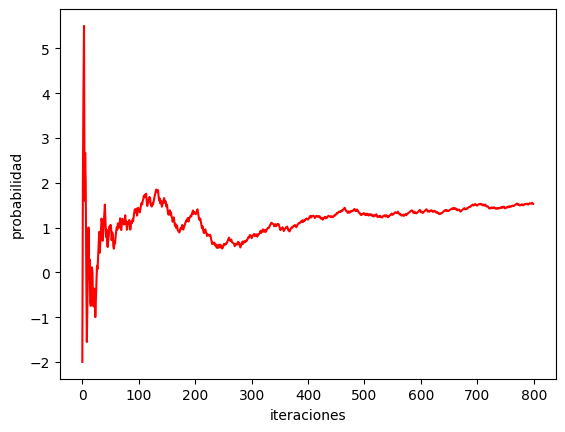

In [29]:
plt.plot(X, color="red") #Graficamos y vemos en que iteración se estabiliza
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('probabilidad') #Etiqueta del eje de las y
plt.show() #Mostrar la gráfica

In [30]:
np.mean(X) #Calculamos la media

1.1791211311332614

**Paso 8:** Replique el modelo

In [32]:
#Repetimos la simulación n veces
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(800) # Realizamos la simulación de beneficio para 800 días
        lista.append(np.mean(s)) # Agregamos la media de los beneficios obtenidos en la lista
    return lista

In [37]:
Y=modelo(150)  # Asignamos valores a n 

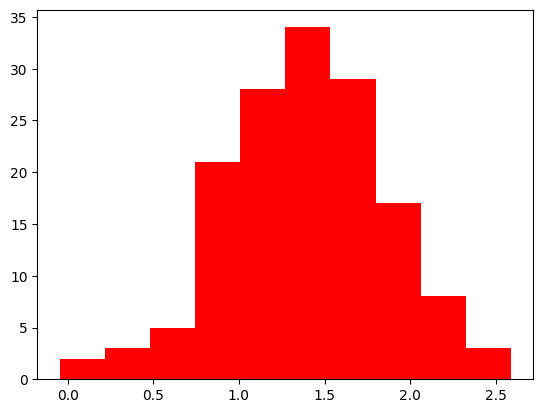

In [39]:
plt.hist(Y, color="red") #Graficamos las n simulaciones
plt.show() #MOstramos la gráfica

**Paso 9:** Calcule la media del beneficio y  su desviación estandar

In [38]:
print(np.mean(Y), np.std(Y)) # Imprimimos la media y la desviación estándar

1.386647794927798 0.4757590888744791


**Paso 10:** Hallar el intervalo de confianza

In [40]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50) #Calculamos el intervalo de confianza

(1.2547741035697213, 1.5185214862858747)

#**Análiticamente**


Considerando la  siguiente tabla 

| Periodicos  |30   |  40  |  50  |  60  |  70  |
|-----------  |-----|------|----  |----  |----  |
|f(x)         |   20% | 25%  | 25%  |  20% | 10%  |
|f(x)         | 0.20 |0.25 | 0.25 | 0.20 | 0.10|
|F(x)         | 0.20 | 0.45| 0.70 | 0.90 | 1.0|
|Intervalo | 0 a 0.19| 0.20 a 0.44 | 0.45 a 0.69 | 0.70 a 0.89 | 0.90 a 1|

Para poder simular las ventas de un día y poder calcular el beneficio, en la siguiente tabla, Considerando que el beneficio se calcula como

  Beneficio = (Precio unitario de venta $\cdot$ ventas reales ) - (costo unitario de adquisición $⋅$ ventas pedidas) 

|Dia | Número aleatorio | Venta simuladas | Ventas reales | Ventas perdidas | Periodicos no vendidos | Beneficio(€) | Beneficio promedio (€)|
|---|---|---|---|---|---|---|---|
|1 | 0.23 | 40 | 40 | 0 | 10 | -2 | -2 |
|2 | 0.73 | 60 | 50 | 10| 0  | 8 |  3   |
|3 | 0.10 | 30 | 30 | 0 | 20 | -14 | -2.66 |
|4 | 0.47 | 60 | 50 | 10 |0 | 8 | 0| 
|5| 0.63 | 50 | 50 | 0 | 0 | 10 | 2|
|6| 0.20 | 40 | 40 | 0 | 10 | -2 | 1.33|
|7| 0.12 | 30 | 30 | 0 | 20 | -14 | -0.8571|
|8| 0.78 | 60 | 50 | 10 | 0 | 8 | 0.25|
|9| 0.71 | 60 | 50 | 10 |0 |8 | 1.11|
|10|0.57|50 | 50 | 0 | 0 | 10 | 2|


Lo cual implica que despues de 10 dias se espera que el quiosquero tenga un beneficio de 2 € de todos los periodicos vendidos.

Los números aleatorios fueron generados por una calculadora, y las cuentas fueron realizadas por excel.




#**Determine, por simulación el pedido de periódicos que optimiza el beneficio**

Tomando nuevamente el código de la sección de simulación para este problema

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [45]:
def ventas_sim():
    ventas=0  # Inicializamos la variable "ventas" en cero
    u = random.random() # Generamos un número aleatorio entre 0 y 1
     # Utilizamos una serie de condicionales para asignar un valor de ventas en función del número aleatorio generado
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas # Retornamos el valor de "ventas" obtenido en la simulación

In [46]:
# Función que calcula el beneficio diario
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    # Si se venden más productos de los que se pidieron
    if vs > pedido:
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
    # Si se venden menos o igual cantidad de productos de los que se pidieron
    else:
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    # Cálculo del beneficio diario con las condiciones del problema
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben 

In [114]:
beneficio(80) # buscaremos el mejor pedido de periodicos para optimizar el beneficio

-44.0

In [115]:
def simulacion(n):
    L=[] #Lista vacia
    benef = 0  # inicializamos la variable para acumular el beneficio total
    for i in range(n):
        benef += beneficio(50) # calculamos el beneficio para un pedido de 50 unidades
        L.append(benef/(i+1)) # agregamos el beneficio promedio de la muestra actual a la lista
    return L # retornamos la lista con los beneficios promedio para cada muestra

In [116]:
X=simulacion(800) # Asignamos valores a n

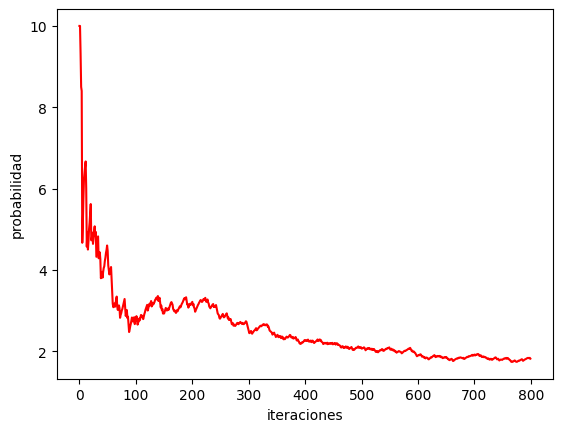

In [117]:
plt.plot(X, color="red") #Graficamos y vemos en que iteración se estabiliza
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('probabilidad') #Etiqueta del eje de las y
plt.show() #Mostrar la gráfica

In [118]:
np.mean(X) #Calculamos la media

2.5588893918684077

En la siguiente tabla tendremos los beneficios dependiendo de del volumen del pedido que se rezalice, esto para poder dar las conclusiones para este inciso 

|Pedido | Beneficio|
|-------|----------|
|50     | 1.0363   |
|100    | 1.8369   |
|200    | 0.4724   |
|300    | 1.4965   |

Podemos observar que el mejor beneficio hasta ahora estan con un pedido de 100, ahora buscaremos un mejor beneficio al rededor de el pedido de 100 periodicos

|Pedido | Beneficio|
|-------|----------|
|70     | 1.4957   |
|80     | 1.8460   |
|90     | 1.2592   |
|100    | 1.8369   |
|110    | 1.5334   |
|300    | 1.4965   |

Bajo los resultados obtenidos, podemos concluir que el pedido más optimo para tener un major beneficio es realizar un pedido de 80 periodicos